# Exploratory Data Analysis

Before the modeling task, we analize our data to summarize their main characteristics. This exploration will help us determine the best way to manipulate the data to get the answers we need. 

### Importing and loading libraries

For our analysis, we need to import the below libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading data

The input data is pulled from **TheCocktailDB API** [https://www.thecocktaildb.com/api.php] through API calls and is obtained in JSON format. Once the data is loaded, we transform and clean it to make it into a more usable format.

In [2]:
%%bigquery base

SELECT 
    idDrink,
    strDrink,
    strIngredient1,
    strIngredient2,
    strIngredient3,
    strIngredient4,
    strIngredient5,
    strIngredient6,
    strIngredient7,
    strIngredient8,
    strIngredient9,
    strIngredient10,
    strIngredient11,
    strIngredient12,
    strIngredient13,
    strIngredient14,
    strIngredient15
FROM `bookish-journey-343419.cocktails_dataset.cocktails-table`

Downloading: 100%|██████████| 425/425 [00:00<00:00, 435.93rows/s]


In [3]:
print(base.shape)
base.head(10)

(425, 17)


,idDrink,strDrink,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strIngredient10,strIngredient11,strIngredient12,strIngredient13,strIngredient14,strIngredient15
0,11407,Gin Cooler,Gin,Carbonated water,Powdered sugar,Orange spiral,Lemon peel,None,None,None,None,None,None,None,None,None,None
1,12916,Egg Nog - Healthy,Egg,Sugar,Condensed milk,Milk,Vanilla extract,Rum,Nutmeg,None,None,None,None,None,None,None,None
2,14195,Snowball,Advocaat,Lemonade,Lemon,Ice,None,None,None,None,None,None,None,None,None,None,None
3,12776,Melya,Espresso,Honey,Cocoa powder,None,None,None,None,None,None,None,None,None,None,None,None
4,11202,Caipirinha,Sugar,Lime,Cachaca,None,None,None,None,None,None,None,None,None,None,None,None
5,11055,Artillery,Sweet Vermouth,Gin,Bitters,None,None,None,None,None,None,None,None,None,None,None,None
6,11936,Pink Gin,Bitters,Gin,None,None,None,None,None,None,None,None,None,None,None,None,None
7,11014,Alexander,Gin,Creme de Cacao,Light cream,Nutmeg,None,None,None,None,None,None,None,None,None,None,None
8,14167,Vodka Martini,Vodka,Dry Vermouth,Olive,None,None,None,None,None,None,None,None,None,None,None,None
9,17176,Ipamena,Lime,Brown sugar,Passion fruit juice,Ginger ale,Ice,None,None,None,None,None,None,None,None,None,None


Our set is made up of 17 variables and 424 observations or cocktail recipes. The first 2 variables refer to the cocktail 

* idDrink
* strDrink (cocktail name)
    
and the rest are the ingredients that are used to prepare the drink (strIngredient1 - strIngredient15).

In [4]:
#Print information about the dataset
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   idDrink          425 non-null    int64 
 1   strDrink         425 non-null    object
 2   strIngredient1   425 non-null    object
 3   strIngredient2   425 non-null    object
 4   strIngredient3   361 non-null    object
 5   strIngredient4   237 non-null    object
 6   strIngredient5   154 non-null    object
 7   strIngredient6   83 non-null     object
 8   strIngredient7   45 non-null     object
 9   strIngredient8   4 non-null      object
 10  strIngredient9   2 non-null      object
 11  strIngredient10  1 non-null      object
 12  strIngredient11  1 non-null      object
 13  strIngredient12  0 non-null      object
 14  strIngredient13  0 non-null      object
 15  strIngredient14  0 non-null      object
 16  strIngredient15  0 non-null      object
dtypes: int64(1), object(16)
memory usag

### Cleaning and transforming data

We observe that the last four columns of the dataset do not contain information on the ingredients, so we remove them from the database.

In [5]:
#Drop variables without registers
base=base.drop(['strIngredient12','strIngredient13','strIngredient14','strIngredient15'],axis=1)

In [6]:
#Eliminate duplicate recipes
base=base.drop_duplicates()
print(base.shape)

(425, 13)


In [7]:
#We made a copy of the database
base0=base.copy()

A variable called *ingredients* was generated which is a string that contains the ingredients of each cocktail. To do this, we replace the NaN values with some character (*) and then we concatenate the variables that register some ingredient. 

In [8]:
#Replace NaN values with character *
base=base.replace(np.nan,"*")

In [9]:
#String with all ingredients of each drink
base['ingredients']=base[['strIngredient1','strIngredient2','strIngredient3','strIngredient4','strIngredient5',
        'strIngredient6','strIngredient7','strIngredient8','strIngredient9','strIngredient10','strIngredient11']].agg(','.join, axis=1)
base.ingredients

0      Gin,Carbonated water,Powdered sugar,Orange spi...
1      Egg,Sugar,Condensed milk,Milk,Vanilla extract,...
2              Advocaat,Lemonade,Lemon,Ice,*,*,*,*,*,*,*
3            Espresso,Honey,Cocoa powder,*,*,*,*,*,*,*,*
4                     Sugar,Lime,Cachaca,*,*,*,*,*,*,*,*
                             ...                        
420         Dry Vermouth,Gin,Benedictine,*,*,*,*,*,*,*,*
421    Egg yolk,Sugar,Milk,Light rum,Bourbon,Vanilla ...
422                    Coffee,Milk,Sugar,*,*,*,*,*,*,*,*
423    Gin,Grenadine,Heavy cream,Milk,Egg White,*,*,*...
424    Rum,Gold rum,151 proof rum,Pernod,Grenadine,Li...
Name: ingredients, Length: 425, dtype: object

In [10]:
#Function to convert text to lowercase and replace blanks with underscore
def lower(text):
    text=text.lower().replace(" ","_")
    return text

In [11]:
#List with lowercase text and spaces with underscore
ingredients_low=[]
for i in base.ingredients:
    il=lower(i)
    ingredients_low.append(il)

In [12]:
#A new variable called by ingredients
base['ingredients']=ingredients_low
base.ingredients

0      gin,carbonated_water,powdered_sugar,orange_spi...
1      egg,sugar,condensed_milk,milk,vanilla_extract,...
2              advocaat,lemonade,lemon,ice,*,*,*,*,*,*,*
3            espresso,honey,cocoa_powder,*,*,*,*,*,*,*,*
4                     sugar,lime,cachaca,*,*,*,*,*,*,*,*
                             ...                        
420         dry_vermouth,gin,benedictine,*,*,*,*,*,*,*,*
421    egg_yolk,sugar,milk,light_rum,bourbon,vanilla_...
422                    coffee,milk,sugar,*,*,*,*,*,*,*,*
423    gin,grenadine,heavy_cream,milk,egg_white,*,*,*...
424    rum,gold_rum,151_proof_rum,pernod,grenadine,li...
Name: ingredients, Length: 425, dtype: object

In [13]:
#Function to tokenize text 
def words(df):
    words=[]
    for i in range(425):
        p=base.ingredients[i].split(",")
        words=p+words
    return words

In [14]:
#List of ingredients
Ingredients=words(base)


#### Total number of ingredients

In our dataset there are only 295 ingredientes. 

In [15]:
ingredients_uniques=[]
for item in Ingredients:
    if item not in ingredients_uniques:
        ingredients_uniques.append(item)

print("The total number of ingredients: ", len(ingredients_uniques)-2)

The total number of ingredients:  295


In [16]:
#Ingredient frequency function
def frecuencia(lista):
    dic={}
    for palabra in lista:
        if palabra in dic.keys():
            dic[palabra]=dic[palabra]+1
        else:
            dic[palabra]=1
    return dic 

In [17]:
conteo=frecuencia(Ingredients)
conteo_dic=dict(sorted(conteo.items(),key=lambda item:item[1], reverse=True))
#conteo_dic

In [18]:
ingredients_df=pd.DataFrame.from_dict(conteo_dic,orient='index').rename(columns={0:'freq'})
ingredients_df


,freq
*,2937
gin,81
,70
vodka,64
sugar,51
...,...
fruit_juice,1
papaya,1
butter,1
marshmallows,1


# Top 10 ingredients 

In [19]:
#Ingredient frequency dataframe
ingredients_df=ingredients_df.drop(["*",""],axis=0)
ingredients_df

,freq
gin,81
vodka,64
sugar,51
lemon_juice,50
orange_juice,43
...,...
fruit_juice,1
papaya,1
butter,1
marshmallows,1


Gin, Vodka, Sugar, Lemon juice, Orange juice, lemon, ice, lime juice, lime and grenadine are the 10 most common ingredients. The top five are used in approximately 68% of all recipes.
The distillates most used in recipes are Gin (19% of all recipes) and Vodka (15%).

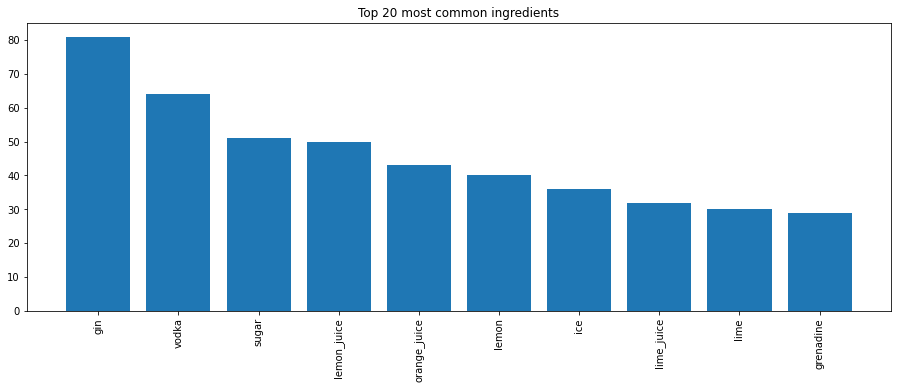

In [20]:
def plot_bar(ingredients_df, top=10):
    fig=plt.figure()
    ax=fig.add_axes([0,0,2,1])
    ax.bar(x=ingredients_df.iloc[:top,:].index, height=ingredients_df.iloc[:top,0].values)
    plt.xticks(rotation=90)
    plt.title("Top 20 most common ingredients")
    plt.show()

plot_bar(ingredients_df,10)

# Number of ingredients per cocktail

To measure the number of ingredients used in each drink, the variable *num_ingredients* is created, which is formed by subtracting the NaN values from the total of *strIngredient* variables.

On average, each cocktail requires 4 ingredients for its preparation. 29% of cocktails use 3 ingredients, while only 4% use more than seven ingredients.

In [21]:
#The variable num_ingredients is generated
base0.shape
base0['num_ingredients']=11-base0.isnull().sum(axis=1)
base0.head(5)


,idDrink,strDrink,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strIngredient10,strIngredient11,num_ingredients
0,11407,Gin Cooler,Gin,Carbonated water,Powdered sugar,Orange spiral,Lemon peel,None,None,None,None,None,None,5
1,12916,Egg Nog - Healthy,Egg,Sugar,Condensed milk,Milk,Vanilla extract,Rum,Nutmeg,None,None,None,None,7
2,14195,Snowball,Advocaat,Lemonade,Lemon,Ice,None,None,None,None,None,None,None,4
3,12776,Melya,Espresso,Honey,Cocoa powder,None,None,None,None,None,None,None,None,3
4,11202,Caipirinha,Sugar,Lime,Cachaca,None,None,None,None,None,None,None,None,3


In [22]:
#Ingredients per cocktail dataframe
ing_per_cocktail=pd.DataFrame(base0['num_ingredients'].value_counts(),columns=['num_ingredients']).reset_index().sort_values(by=['num_ingredients'])
ing_per_cocktail['number_ingr']=['eleven','nine','eight','seven','six','two','five','four','three']
ing_per_cocktail

,index,num_ingredients,number_ingr
7,9,1,eleven
8,11,1,nine
6,8,2,eight
5,6,38,seven
4,7,41,six
3,2,64,two
2,5,71,five
1,4,83,four
0,3,124,three


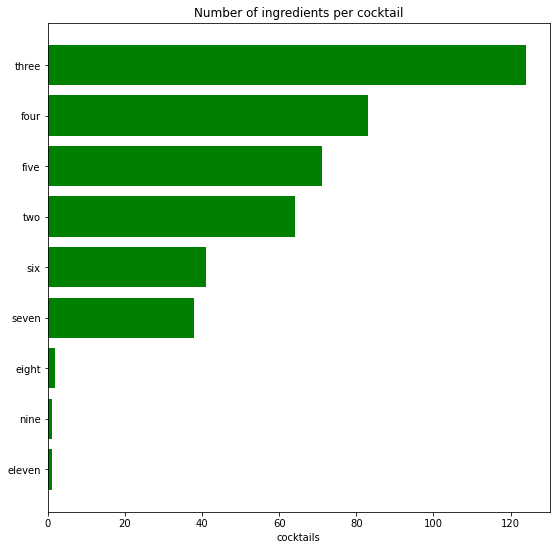

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(9,9)
ax.barh(y=ing_per_cocktail['number_ingr'], width=ing_per_cocktail['num_ingredients'],color='green');
ax.set_title("Number of ingredients per cocktail");
plt.xlabel('cocktails');

## Cocktails with more Ingredients

In [24]:
MaxIngredient = base0[["strDrink","num_ingredients"]]

In [25]:
Top5= MaxIngredient.sort_values(by = "num_ingredients", ascending=False).head()

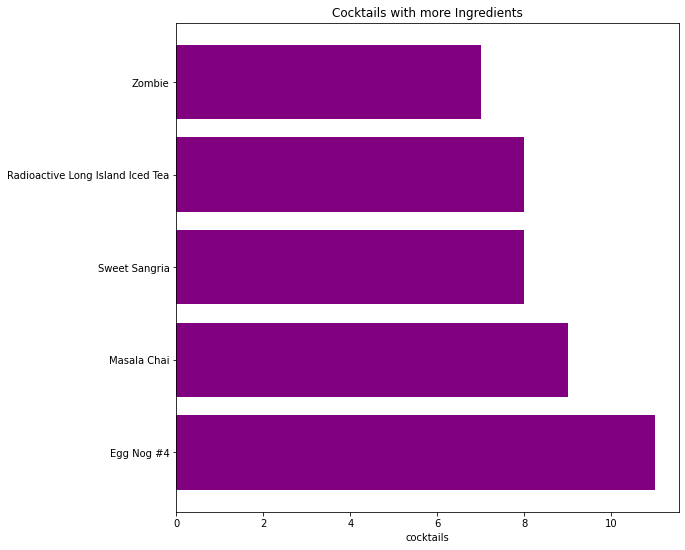

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(9,9)
ax.barh(y=Top5['strDrink'], width=Top5['num_ingredients'],color='purple');
ax.set_title("Cocktails with more Ingredients");
plt.xlabel('cocktails');

The 5 cocktails with more ingredients are: Egg Nog 4, Masala Chai, Sweet Sangria, Radioactiva Long Island Tea and Zombie.